## **Problem 1:**
A healthy child’s systolic blood pressure p (in millimeters of mercury) and weight w (in pounds) are approximately related by the equation,

$$p = \beta_0 + \beta_1 \log(w)$$

Hint: consider $x = \log(w)$

Use the following experimental data to estimate the systolic blood pressure of a healthy child weighing 100 pounds.

<table>
  <tr>
    <td>w</td>
    <td>44</td>
    <td>61</td>
    <td>81</td>
    <td>113</td>
    <td>131</td>
  </tr>

  <tr>
    <td>p</td>
    <td>91</td>
    <td>98</td>
    <td>103</td>
    <td>110</td>
    <td>112</td>
  </tr>
</table>

In [4]:
# write your code here


import numpy as np
from sklearn.linear_model import LinearRegression


#load data into variables
w = np.array([44, 61, 81, 113, 131])
p = np.array([91, 98, 103, 110, 112])

# [consider 𝑥=log(𝑤)]
x = np.log(w)

# Reshape x to a 2D array for regression
X = x.reshape(-1, 1)

# Fit linear regression model
model = LinearRegression().fit(X, p)

# Print the estimated coefficients
beta0 = model.intercept_
beta1 = model.coef_[0]
print(f"Beta0 = {beta0:.2f}, Beta1 = {beta1:.2f}")

# Estimate the systolic blood pressure for a child weighing 100 pounds
w_new = 100
x_new = np.log(w_new)
p_new = beta0 + beta1 * x_new
print(f"Estimated systolic blood pressure for a child weighing {w_new} pounds: {p_new:.2f} mmHg")



Beta0 = 17.92, Beta1 = 19.38
Estimated systolic blood pressure for a child weighing 100 pounds: 107.20 mmHg


## **Problem 2:**

In this assignment, you will implement linear regression (without using `np.polyfit`) and apply it to the [Assignment 4 Dataset](https://docs.google.com/spreadsheets/d/17dWB3kwgzPXRIeuS5YtrbdRHnpSzdH3m/edit?usp=sharing&ouid=101114531299819009465&rtpof=true&sd=true). The dataset contains two columns, the first column is the feature and the second column is the label. The goal is find the best fit line for the data.

Use `pd.read_excel()` to read the file and make prediction of rainfall based on the average precipitation for past 10 days. Compare the $r^2$ value obtained from the linear regression with that obtained through quadratic regression (Hint: use `np.polyfit`)



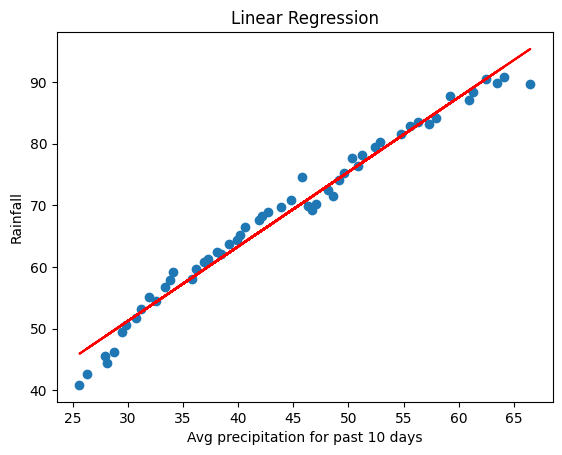

Linear Regression r-squared value: 0.9774714628301312
Quadratic Regression r-squared value: 0.9881519664679186


In [3]:
# write your code here

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("https://docs.google.com/spreadsheets/d/17dWB3kwgzPXRIeuS5YtrbdRHnpSzdH3m/export?format=xlsx")

# Extract the feature and label columns
X = df.iloc[:, 0]
y = df.iloc[:, 1]

# mean of X and y
mean_x = np.mean(X)
mean_y = np.mean(y)

# Calculate the slope and intercept of the regression line
n = len(X)
numerator = 0
denominator = 0
for i in range(n):
    numerator += (X[i] - mean_x) * (y[i] - mean_y)
    denominator += (X[i] - mean_x) ** 2
slope = numerator / denominator
intercept = mean_y - slope * mean_x

# Make predictions using the regression line
predictions = slope * X + intercept

# Calculate the r-squared value
ss_tot = 0
ss_res = 0
for i in range(n):
    ss_tot += (y[i] - mean_y) ** 2
    ss_res += (y[i] - predictions[i]) ** 2
r_squared = 1 - (ss_res / ss_tot)

# Plot the data and regression line
plt.scatter(X, y)
plt.plot(X, predictions, color='red')
plt.xlabel("Avg precipitation for past 10 days")
plt.ylabel("Rainfall")
plt.title("Linear Regression")
plt.show()

# Calculate the r-squared value for quadratic regression
coef = np.polyfit(X, y, 2)
p = np.poly1d(coef)
y_pred = p(X)
r_squared_quad = 1 - (np.sum((y - y_pred) ** 2) / np.sum((y - np.mean(y)) ** 2))

# Print the r-squared values for both linear and quadratic regression
print("Linear Regression r-squared value:", r_squared)
print("Quadratic Regression r-squared value:", r_squared_quad)
